In [1]:
from sklearn.cluster import KMeans
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# finding clusters of amenities and their centers for optimal hotel booking locations

In [3]:
# What if I want to book a hotel based on nearest frozen dessert places?
frozen_dessert_amenities = pd.read_json('frozen_desserts.json', lines=True)
frozen_dessert_amenities

,lat,lon,amenity,name,tags,closest_name
0,49.189652,-122.803464,bar,Yogen Fruz,{'name:en': 'Yogen Fruz'},Yogen Früz
1,49.226578,-123.000636,bar,Yogen Fruz,"{'level': '0', 'name:en': 'Yogen Fruz'}",Yogen Früz
2,49.286674,-123.128309,ice_cream,Yogen Früz,"{'brand:wikidata': 'Q8054358', 'addr:housenumb...",Yogen Früz
3,49.275335,-123.123731,fast_food,Menchie's Frozen Yogourt,"{'addr:housenumber': '412', 'drive_through': '...",Menchie's Frozen Yogurt
4,49.218635,-122.955424,bar,Menchies Frozen Yoghurt,{'name:en': 'Menchies Frozen Yoghurt'},Menchie's Frozen Yogurt
5,49.276624,-122.794802,ice_cream,Marble Slab Creamery,"{'brand:wikidata': 'Q17020087', 'addr:housenum...",Marble Slab Creamery
6,49.117708,-122.670502,ice_cream,Marble Slab Creamery,"{'brand:wikidata': 'Q17020087', 'addr:housenum...",Marble Slab Creamery
7,49.042768,-122.779738,ice_cream,Marble Slab Creamery,"{'brand:wikidata': 'Q17020087', 'addr:housenum...",Marble Slab Creamery
8,49.191614,-122.947590,fast_food,Marble Slab Creamery,"{'cuisine': 'ice_cream', 'takeaway': 'yes'}",Marble Slab Creamery
9,49.132632,-123.093106,ice_cream,Marble Slab Creamery,"{'brand:wikidata': 'Q17020087', 'cuisine': 'ic...",Marble Slab Creamery


In [4]:
X = frozen_dessert_amenities[['lat','lon']].values
# use Within-Cluster-Sum-of-Squares (WCSS)
wcss=[]

In [5]:
# use the elbow method to find the number of k-means clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[1.3939492630805546,
 0.42275068869873744,
 0.3023124116906488,
 0.2165004642265137,
 0.15038369252371436,
 0.11397494538649545,
 0.08108682236329688,
 0.06823527754534288,
 0.06084301298399729,
 0.0480114588281518]

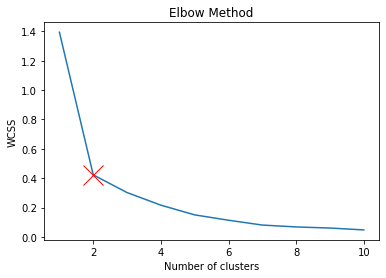

In [6]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(2, 0.42275068869873744, color='red', marker = 'x', markersize=20, alpha=1)
plt.show()

In [7]:
# graph shows cluster = 2 is a good number
kmeans = KMeans(n_clusters=2, init ='k-means++')
y_kmeans = kmeans.fit_predict(X)

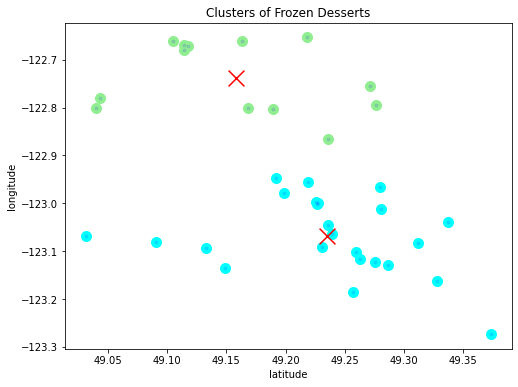

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(frozen_dessert_amenities['lat'], frozen_dessert_amenities['lon'], 'b.', alpha=0.1)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='cyan', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='lightgreen', label ='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, c='red', marker='x', label = 'Centroids',alpha=1)
plt.title('Clusters of Frozen Desserts')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()
frozen_desserts_center = kmeans.cluster_centers_

In [9]:
# What if I want to book a hotel based on the convenience of transportation amenities?
transport_amenities = pd.read_json('transportation-amenities-vancouver.json', lines=True)
transport_amenities

,lat,lon,amenity,name,tags
0,49.262503,-123.114403,bicycle_rental,10th & Cambie,"{'ref': '0001', 'operator': 'Vancouver Bike Sh..."
1,49.262220,-123.109316,bicycle_rental,10th & Columbia,"{'ref': '0172', 'capacity': '14', 'network': '..."
2,49.261412,-123.070159,bicycle_rental,10th & Commercial,"{'ref': '0244', 'capacity': '26', 'network': '..."
3,49.261471,-123.089487,bicycle_rental,10th & Fraser,"{'ref': '0260', 'capacity': '14', 'network': '..."
4,49.262592,-123.138880,bicycle_rental,10th & Granville,"{'ref': '0070', 'capacity': '24', 'network': '..."
...,...,...,...,...,...
378,49.266643,-123.116065,car_sharing,None,"{'operator': 'Car2go', 'capacity': '5'}"
379,49.266854,-123.115754,car_sharing,None,"{'operator': 'Zipcars', 'capacity': '2'}"
380,49.284624,-123.127353,car_sharing,None,"{'operator': 'Modo', 'capacity': '1'}"
381,49.194644,-123.130984,bicycle_rental,None,"{'fee': 'yes', 'capacity': '10', 'network': 'U..."


In [10]:
# use the elbow method to find the number of k-means clusters
wcss = []
X = transport_amenities[['lat','lon']].values
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[7.472058189112036,
 1.8553992110263318,
 0.8483572964296922,
 0.5870978210631496,
 0.41804315126660896,
 0.3025470469195002,
 0.23367141358396004,
 0.19950741064765376,
 0.16587145794444766,
 0.13792410224341733]

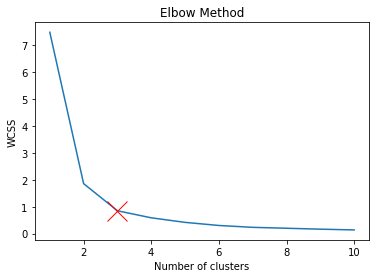

In [11]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(3, 0.8483572964296922, color='red', marker = 'x', markersize=20, alpha=1)
plt.show()

In [12]:
# graph shows cluster = 3 is a good number
kmeans = KMeans(n_clusters=3, init ='k-means++')
y_kmeans = kmeans.fit_predict(X)

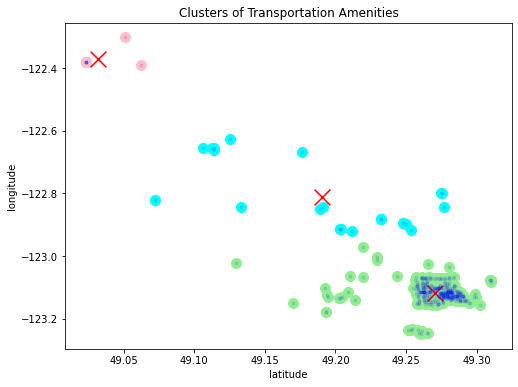

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(transport_amenities['lat'], transport_amenities['lon'], 'b.',alpha=0.1)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='cyan', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='lightgreen', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='pink', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, c='red', marker='x', label = 'Centroids',alpha=1)
plt.title('Clusters of Transportation Amenities')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()
transport_center = kmeans.cluster_centers_

In [14]:
# convert the cluster center locations into pandas dataframe
frozen_desserts_center
frozen_dessert_amenity = np.array([['frozen dessert'],['frozen dessert']])
frozen_desserts_center = np.append(frozen_desserts_center, frozen_dessert_amenity, axis=1)
transport_center
transport_amenity = np.array([['transport'],['transport'],['transport']])
transport_center = np.append(transport_center, transport_amenity, axis=1)
clusters = np.concatenate((frozen_desserts_center,transport_center))
clusters

array([['49.2354883125', '-123.068676725', 'frozen dessert'],
       ['49.158228092307695', '-122.73821485384616', 'frozen dessert'],
       ['49.190792572727275', '-122.81188975', 'transport'],
       ['49.27071874815864', '-123.11658119065156', 'transport'],
       ['49.0313407', '-122.37192776250001', 'transport']], dtype='<U32')

In [15]:
cluster_centers = pd.DataFrame(data=clusters, columns=['lat', 'lon','amenity'])
cluster_centers

,lat,lon,amenity
0,49.2354883125,-123.068676725,frozen dessert
1,49.158228092307695,-122.73821485384616,frozen dessert
2,49.190792572727275,-122.81188975,transport
3,49.27071874815864,-123.11658119065156,transport
4,49.0313407,-122.37192776250001,transport


In [16]:
cluster_centers.to_json('cluster-centers.json', orient='records', lines=True)

In [17]:
# access all hotel locations
hotel_df = pd.read_json('vancouver-hotels.json',lines=True)
hotel_df

,name,amenity,tags,lat,lon
0,Caron Creek RV Park & Riverview B&B,Bed & Breakfasts; Campgrounds & RV Parks - Pri...,"7545 Hwy 97S, Chetwynd, BC",55.619951,-121.814346
1,Caprice B&B,Bed & Breakfasts;,"1111 Gower Point Rd, Gibsons, BC",49.386438,-123.530209
2,"Hampton Inn & Suites by Hilton, Downtown Vanco...",Hotels & Motels;,"111 Robson St, Vancouver, BC",49.277779,-123.114212
3,Ramada Limited Downtown Vancouver,Hotels & Motels;,"435 Pender St W, Vancouver, BC",49.283282,-123.112543
4,Ocean Island Inn | Backpackers | Suites,Hostels;,"791 Pandora Ave, Victoria, BC",48.427968,-123.364059
...,...,...,...,...,...
865,E'Laysa Guesthouse and Vineyard Retreat,Bed & Breakfasts;,"1056 Corbishley Avenue, Penticton, BC",49.520043,-119.570205
866,Hotel Kimberley,Hotels & Motels;,"300 Wallinger Avenue, Kimberley, BC",49.684565,-115.983007
867,Howard Johnson Fort St. John,Hotels & Motels;,"8540 Alaska Road, Fort St. John, BC",56.229501,-120.820567
868,Pilots' Loft,Bed & Breakfasts;,"1408 Highlands Blvd., Agassiz, BC",49.231028,-121.910758


In [18]:
from math import cos, asin, sqrt
# closest distance between latitude and longitude to find nearest hotels for cluster centers
# functions from https://stackoverflow.com/questions/41336756/find-the-closest-latitude-and-longitude
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

hotel_location = hotel_df.filter(items=['lat','lon'])
hotel_location = hotel_location.to_dict('records')

In [19]:
# find closest hotel location for the two cluster centers of frozen desserts
desserts = cluster_centers[cluster_centers['amenity'] =='frozen dessert']
desserts.loc[:, ('lat')] = desserts.loc[:, ('lat')].astype(float)
desserts.loc[:, ('lon')] = desserts.loc[:, ('lon')].astype(float)
desserts = desserts.drop(columns=['amenity'])
desserts = desserts.to_dict('records')
close1 = closest(hotel_location, desserts[0])
close2 = closest(hotel_location, desserts[1])

closest_hotels1 = pd.DataFrame(list(close1.items()))
closest_hotels1 = closest_hotels1.T
closest_hotels1 = closest_hotels1.rename(columns={0: "lat", 1: "lon"})
closest_hotels1 = closest_hotels1.drop([0])

closest_hotels2 = pd.DataFrame(list(close2.items()))
closest_hotels2 = closest_hotels2.T
closest_hotels2 = closest_hotels2.rename(columns={0: "lat", 1: "lon"})
closest_hotels2 = closest_hotels2.drop([0])
closest_hotels_desserts = closest_hotels1.append(closest_hotels2)
closest_hotels_desserts.loc[:, ('lat')] = closest_hotels_desserts.loc[:, ('lat')].astype(float)
closest_hotels_desserts.loc[:, ('lon')] = closest_hotels_desserts.loc[:, ('lon')].astype(float)
hotel_desserts = hotel_df.loc[(hotel_df['lat'].isin(closest_hotels_desserts['lat'])) & (hotel_df['lon'].isin(closest_hotels_desserts['lon']))]
hotel_desserts

C:\Users\John Zheng\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\John Zheng\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,name,amenity,tags,lat,lon
231,2400 Motel,Hotels & Motels;,"2400 Kingsway St, Vancouver, BC",49.240667,-123.056100
509,Holiday Inn Express & Suites Surrey,Hotels & Motels;,"15808 - 104th Ave, Surrey, BC",49.191517,-122.782498


In [20]:
hotel_desserts.to_json('closest-hotel-desserts.json', orient='records', lines=True)

In [21]:
# find closest hotel location for the three cluster centers of transportation
desserts = cluster_centers[cluster_centers['amenity'] =='transport']
desserts.loc[:, ('lat')] = desserts.loc[:, ('lat')].astype(float)
desserts.loc[:, ('lon')] = desserts.loc[:, ('lon')].astype(float)
desserts = desserts.drop(columns=['amenity'])
desserts = desserts.to_dict('records')
close1 = closest(hotel_location, desserts[0])
close2 = closest(hotel_location, desserts[1])
close3 = closest(hotel_location, desserts[2])

closest_hotels1 = pd.DataFrame(list(close1.items()))
closest_hotels1 = closest_hotels1.T
closest_hotels1 = closest_hotels1.rename(columns={0: "lat", 1: "lon"})
closest_hotels1 = closest_hotels1.drop([0])

closest_hotels2 = pd.DataFrame(list(close2.items()))
closest_hotels2 = closest_hotels2.T
closest_hotels2 = closest_hotels2.rename(columns={0: "lat", 1: "lon"})
closest_hotels2 = closest_hotels2.drop([0])

closest_hotels3 = pd.DataFrame(list(close3.items()))
closest_hotels3 = closest_hotels3.T
closest_hotels3 = closest_hotels3.rename(columns={0: "lat", 1: "lon"})
closest_hotels3 = closest_hotels3.drop([0])

closest_hotels_transport = closest_hotels1.append(closest_hotels2)
closest_hotels_transport = closest_hotels_transport.append(closest_hotels3)
closest_hotels_transport.loc[:, ('lat')] = closest_hotels_transport.loc[:, ('lat')].astype(float)
closest_hotels_transport.loc[:, ('lon')] = closest_hotels_transport.loc[:, ('lon')].astype(float)
hotel_transport = hotel_df.loc[(hotel_df['lat'].isin(closest_hotels_transport['lat'])) & (hotel_df['lon'].isin(closest_hotels_transport['lon']))]
hotel_transport

C:\Users\John Zheng\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\John Zheng\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,name,amenity,tags,lat,lon
75,Opus Hotel Vancouver,Hotels & Motels;,"322 Davie St, Vancouver, BC",49.274951,-123.122829
113,Sandman Suites Surrey (Guildford),Hotels & Motels;,"10608 151A St, Surrey, BC",49.195125,-122.802044
788,Brookside Inn,Bed & Breakfasts; Hotels & Motels;,"2379 Chardonnay Lane, Abbotsford, BC",49.045351,-122.407998


In [22]:
hotel_transport.to_json('closest-hotel-transport.json', orient='records', lines=True)